<a href="https://colab.research.google.com/github/nesthsaa/Checkpoint-Data-Mining/blob/main/Checkpoint_3_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Preferensi Konsumen dalam Pembelian Kacamata Menggunakan Model Supervised Learning**

Nama: Agnesia Prawini Thesalonik

NIM: 2209116068

Kelas: B 2022

#**Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis berdasarkan dataset ini adalah untuk mengidentifikasi merek, harga, dan deskripsi produk yang paling populer guna menciptakan produk yang sesuai dengan minat konsumen sehingga dapat memaksimalkan penjualan pada perusahaan dan menarik lebih banyak pelanggan.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah kondisi pasar yang sangat beragam yang mana mencakup berbagai jenis kacamata dari berbagai brand yang berbeda sehingga sulit untuk menyusun pola atau tren yang konsisten. Diperlukan pemahaman dan pengelompokkan preferensi konsumen dari data yang beragam ini untuk merancang strategi pemasaran yang efektif.

##**Data Mining Goals**

Tujuan dilakukan penggalian data pada dataset ini adalah untuk mengidentifikasi trend, preferensi, dan kebutuhan konsumen. Hal ini dapat membantu perusahaan untuk mengetahui apa yang diinginkan dan diminati oleh konsumen dan menghasilkan produk yang relevan.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini diawali dengan pengumpulan data yang relevan. Selanjutnya akan dilakukan analisis awal untuk memahami struktur dan isi data. Kemudian, dilakukan identifikasi variabel yang terdapat dalam dataset. Setelah itu, data dieksplorasi untuk mengidentifikasi perilaku konsumen dalam membeli kacamata dan meninjau korelasi antar variabel. Kualitas data juga akan dievaluasi untuk memvalidasi informasi. Tahap terakhir adalah pengambilan kepurusan berdasarkan hasil analisis dan model prediktif

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset ini berisi informasi penjualan kacamata terlaris di Amazon yang diperoleh melalui kaggle.

Link: https://www.kaggle.com/datasets/kanchana1990/2024-best-selling-sunglasses-on-amazon

In [ ]:
df = pd.read_csv('best_sellers_amazon_2024_sunglasses.csv')
df.head(10)

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,NaN,NaN,NaN,4.4,8032.0
1,WearMe Pro - Reflective Lens Round Trendy Sung...,WearMe Pro,NaN,NaN,NaN,4.5,19647.0
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,NaN,NaN,NaN,4.5,475.0
3,Locs Gangster Oversized Rectangular Horn Rim S...,Locs,Macho men's authentic OG Locs gangster shades ...,$,7.35,4.5,3090.0
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,NaN,NaN,NaN,4.4,6299.0
5,SOJOS Classic Square Sunglasses for Women Men ...,SOJOS,NaN,NaN,NaN,4.6,4397.0
6,MERRY'S Rectangular Polarized Sports Sunglasse...,MERRY'S,NaN,$,13.99,4.4,6977.0
7,SUNGAIT Vintage Round Sunglasses for Women Men...,SUNGAIT,NaN,NaN,NaN,4.6,51091.0
8,grinderPUNCH XL Men's Big Wide Frame Black Sun...,grinderPUNCH,Dark Black Tint Lens! Perfect for Days Spent o...,$,15.99,4.2,4207.0
9,Buyisgle Eye Glasses Holder Strap - Sunglasses...,Buyisgle,NaN,$,9.96,4.6,46.0


##**Describe Data**

####Informasi Dasar

Dataset ini mencakup informasi produk kacamata terlaris dari berbagai merek di Amazon. Dataset ini memberikan gambaran tentang preferensi konsumen dan tren pasar dalam kategori kacamata.

In [ ]:
baris, kolom = df.shape
print("jumlah baris:", baris)
print("Jumlah kolom:", kolom)

jumlah baris: 260
Jumlah kolom: 7


Kode ini memberikan informasi tentang jumlah baris, jumlah kolom, dan tipe data setiap kolom. Berdasarkan output dari kode di atas terlihat bahwa dataset ini memiliki 260 baris dan 7 kolom.

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           260 non-null    object 
 1   brand           260 non-null    object 
 2   description     84 non-null     object 
 3   price/currency  100 non-null    object 
 4   price/value     100 non-null    float64
 5   stars           259 non-null    float64
 6   reviewsCount    259 non-null    float64
dtypes: float64(3), object(4)
memory usage: 14.3+ KB


Kolom title:
*  Berisi nama produk kacamata
*  Memiliki 260 baris yang tidak null
*  Tipe data object

Kolom brand:
*  Berisi nama brand atau merek yang menjual kacamata
*  Memiliki 260 baris yang tidak null
*  Tipe data object

Kolom description:
*  Berisi deskripsi singkat tentang produk kacamata
*  Memiliki 84 baris yang tidak null
*  Tipe data object

Kolom price/currency:
*  Berisi mata uang dari harga kacamata
*  Memiliki 100 baris yang tidak null
*  Tipe data object

Kolom price/value:
*  Berisi harga produk kacamata
*  Memiliki 100 baris yang tidak null
*  Tipe data float

Kolom stars:
*  Berisi rating produk
*  Memiliki 259 baris yang tidak null
*  Tipe data float

Kolom reviewsCount: Jumlah review produk dengan tipe data float
*  Berisi jumlah review produ
*  Memiliki 259 baris yang tidak null
*  Tipe data float

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,price/value,stars,reviewsCount
count,100.000000,259.000000,259.000000
mean,20.997260,4.427413,5477.942085
std,22.397588,0.151675,8142.612586
min,0.007000,3.800000,14.000000
25%,13.725000,4.300000,853.500000
50%,15.985000,4.400000,2473.000000
75%,23.855000,4.500000,6123.000000
max,195.000000,4.800000,51091.000000


Berdasarkan informasi di atas, dapat disimpulkan bahwa:

*   Harga rata-rata produk adalah $20,997

*   Rating rata-rata produk adalah 4,43 bintang

*   Jumlah ulasan rata-rata produk adalah 5477,94

*   Produk termurah memiliki harga $7,00.

*   Produk termahal memiliki harga $195

*   Produk dengan rating terendah adalah 3,8 bintang.
*   Produk dengan rating tertinggi adalah 4,8 bintang.
*   Produk dengan jumlah ulasan terendah adalah sejumlah 14 ulasan
*   Produk dengan jumlah ulasan tertinggi adalah sekitar 51 ulasan


##**Exploratory Data Analysis**

In [ ]:
px.imshow(df.corr(numeric_only=True))

Visualisasi di atas menunjukkan bahwa:

*   Terdapat korelasi positif namun lemah antara price/value dan stars yaitu sebesar 0.160166. Dapat disimpulkan bahwa ketika harga kacamata meningkat, jumlah bintang yang diberikan untuk produk tersebut juga cenderung meningkat.
*   Terdapat korelasi negatif antara price/value dan reviewsCount yaitu sebesar -0.125757. Dapat disimpulkan bahwa ketika harga kacamata meningkat, jumlah ulasan yang diberikan untuk produk tersebut cenderung menurun.
*   Terdapat korelasi positif namun lemah antara stars dan reviewsCount yaitu sebesar 0.112814. Dapat disimpulkan bahwa ketika jumlah bintang yang diberikan untuk suatu produk meningkat, jumlah ulasan yang diberikan untuk produk tersebut juga cenderung meningkat.

<ipython-input-4-fbe18c14360d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Produk')

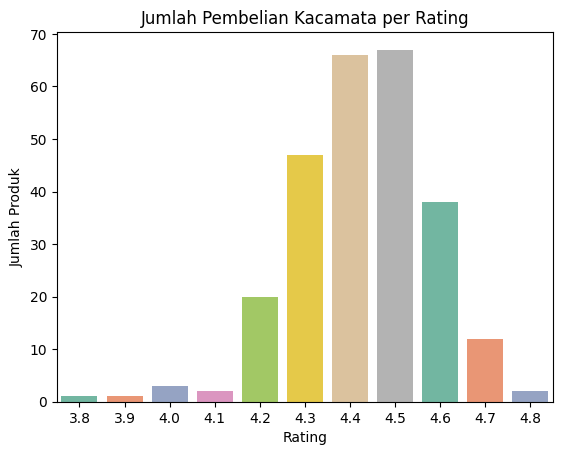

In [ ]:
sns.countplot(x='stars', data=df, palette='Set2')
plt.title('Jumlah Pembelian Kacamata per Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Produk')

Visualisasi di atas menunjukkan bahwa produk yang paling sedikit dibeli adalah produk dengan rating 3,8 dan 3,9. Sedangkan produk yang paling laku adalah produk dengan rating 4,5. Hal ini dapat dilihat dari jumlah pembelian kacamata yang paling banyak pada rating tersebut yaitu lebih dari 60 produk.

##**Verify Data Quality**

####Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() / len(df)*100, columns=['Null Ration in %'])

,Null Ration in %
title,0.000000
brand,0.000000
description,67.692308
price/currency,61.538462
price/value,61.538462
stars,0.384615
reviewsCount,0.384615


Berdasarkan output di atas, dapat disimpulkan bahwa description adalah kolom dengan nilai null terbanyak yaitu sekitar 67% atau sekitar 176 kolom. Kemudian ada kolom price/currency dan price/value yang memiliki nilai null yang sama yaitu sekitar 61% atau sebanyak 160 kolom. Lalu, ada kolom stars dan reviewsCount yang memiliki nilai null sekitar 0,38% atau hanya 1 kolom. Title dan brand memiliki rasio 0% yang artinya tidak ada nilai null pada kedua kolom ini.

####Outliers Values

In [ ]:
outliers = df[(df < df.quantile(0.25) - 1.5 * (df.quantile(0.75) - df.quantile(0.25))) | (df > df.quantile(0.75) + 1.5 * (df.quantile(0.75) - df.quantile(0.25)))].dropna(how='all')
print(outliers)

    title brand description price/currency  price/value  stars  reviewsCount
1     NaN   NaN         NaN            NaN          NaN    NaN       19647.0
7     NaN   NaN         NaN            NaN          NaN    NaN       51091.0
14    NaN   NaN         NaN            NaN          NaN    NaN       26606.0
17    NaN   NaN         NaN            NaN          NaN    NaN       30866.0
19    NaN   NaN         NaN            NaN          NaN    NaN       33097.0
21    NaN   NaN         NaN            NaN          NaN    NaN       14351.0
26    NaN   NaN         NaN            NaN          NaN    NaN       26742.0
27    NaN   NaN         NaN            NaN          NaN    NaN       31834.0
28    NaN   NaN         NaN            NaN          NaN    NaN       18645.0
29    NaN   NaN         NaN            NaN          NaN    NaN       28503.0
32    NaN   NaN         NaN            NaN          NaN    NaN       14340.0
33    NaN   NaN         NaN            NaN          NaN    NaN       19513.0

<ipython-input-46-7c5b03ffe4a3>:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-46-7c5b03ffe4a3>:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



Informasi di atas menunjukkan bahwa terdapat tiga kolom yang memiliki nilai outliers yaitu kolom price/value, stars, dan reviewsCount dengan nilai outliers terbanyak di antara kolom lainnya. Hal ini berarti terdapat nilai yang signifikan berbeda di antara nilai lainnya pada ketiga kolom tersebut

####Duplicated Values

In [ ]:
df[df.duplicated]

,title,brand,description,price/currency,price/value,stars,reviewsCount
163,FAGUMA Sports Polarized Sunglasses For Men Cyc...,FAGUMA,NaN,NaN,NaN,4.4,23144.0


Berdasarkan output di atas, ditemukan bahwa terdapat satu data yang duplikat yaitu pada data di kolom 163.

#**DATA PREPARATION**

In [2]:
df = pd.read_csv('best_sellers_amazon_2024_sunglasses.csv')

In [3]:
df.head()

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,NaN,NaN,NaN,4.4,8032.0
1,WearMe Pro - Reflective Lens Round Trendy Sung...,WearMe Pro,NaN,NaN,NaN,4.5,19647.0
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,NaN,NaN,NaN,4.5,475.0
3,Locs Gangster Oversized Rectangular Horn Rim S...,Locs,Macho men's authentic OG Locs gangster shades ...,$,7.35,4.5,3090.0
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,NaN,NaN,NaN,4.4,6299.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           260 non-null    object 
 1   brand           260 non-null    object 
 2   description     84 non-null     object 
 3   price/currency  100 non-null    object 
 4   price/value     100 non-null    float64
 5   stars           259 non-null    float64
 6   reviewsCount    259 non-null    float64
dtypes: float64(3), object(4)
memory usage: 14.3+ KB


##**Data Cleaning**

### **Penanganan Missing Values**

##### **Pengecekkan Missing Values**

In [5]:
print((df.isna().sum() / len(df)) * 100)

title              0.000000
brand              0.000000
description       67.692308
price/currency    61.538462
price/value       61.538462
stars              0.384615
reviewsCount       0.384615
dtype: float64


Nilai Kosong Pada Kolom Description

In [6]:
df[df['description'].isnull()]

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,NaN,NaN,NaN,4.4,8032.0
1,WearMe Pro - Reflective Lens Round Trendy Sung...,WearMe Pro,NaN,NaN,NaN,4.5,19647.0
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,NaN,NaN,NaN,4.5,475.0
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,NaN,NaN,NaN,4.4,6299.0
5,SOJOS Classic Square Sunglasses for Women Men ...,SOJOS,NaN,NaN,NaN,4.6,4397.0
...,...,...,...,...,...,...,...
247,FEISEDY Fashion Square Aviator Sunglasses Wome...,FEISEDY,NaN,NaN,NaN,4.2,98.0
248,Cindeer 6 Pairs Men's Polarized Sunglasses Wra...,Cindeer,NaN,$,16.99,4.0,149.0
255,SA106 Mens Retro Vintage Narrow Rectangular Pi...,SA106,NaN,NaN,NaN,4.4,419.0
257,SUNGAIT Polygon Aviator Sunglasses for Men Pol...,SUNGAIT,NaN,NaN,NaN,4.5,1003.0


Nilai Kosong Pada Kolom price/currency

In [7]:
df[df['price/currency'].isnull()]

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,NaN,NaN,NaN,4.4,8032.0
1,WearMe Pro - Reflective Lens Round Trendy Sung...,WearMe Pro,NaN,NaN,NaN,4.5,19647.0
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,NaN,NaN,NaN,4.5,475.0
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,NaN,NaN,NaN,4.4,6299.0
5,SOJOS Classic Square Sunglasses for Women Men ...,SOJOS,NaN,NaN,NaN,4.6,4397.0
...,...,...,...,...,...,...,...
253,ARNETTE An4202 Fastball Rectangular Sunglasses,ARNETTE,Arnette's AN4202 Fastball Rectangular Sunglass...,NaN,NaN,4.5,1096.0
254,A｜X ARMANI EXCHANGE Men's Ax2034s Aviator Sung...,A｜X ARMANI EXCHANGE,Framing the athletic mood of the AX apparel co...,NaN,NaN,4.3,105.0
255,SA106 Mens Retro Vintage Narrow Rectangular Pi...,SA106,NaN,NaN,NaN,4.4,419.0
257,SUNGAIT Polygon Aviator Sunglasses for Men Pol...,SUNGAIT,NaN,NaN,NaN,4.5,1003.0


Nilai Kosong Pada Kolom price/value

In [8]:
df[df['price/value'].isnull()]

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,NaN,NaN,NaN,4.4,8032.0
1,WearMe Pro - Reflective Lens Round Trendy Sung...,WearMe Pro,NaN,NaN,NaN,4.5,19647.0
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,NaN,NaN,NaN,4.5,475.0
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,NaN,NaN,NaN,4.4,6299.0
5,SOJOS Classic Square Sunglasses for Women Men ...,SOJOS,NaN,NaN,NaN,4.6,4397.0
...,...,...,...,...,...,...,...
253,ARNETTE An4202 Fastball Rectangular Sunglasses,ARNETTE,Arnette's AN4202 Fastball Rectangular Sunglass...,NaN,NaN,4.5,1096.0
254,A｜X ARMANI EXCHANGE Men's Ax2034s Aviator Sung...,A｜X ARMANI EXCHANGE,Framing the athletic mood of the AX apparel co...,NaN,NaN,4.3,105.0
255,SA106 Mens Retro Vintage Narrow Rectangular Pi...,SA106,NaN,NaN,NaN,4.4,419.0
257,SUNGAIT Polygon Aviator Sunglasses for Men Pol...,SUNGAIT,NaN,NaN,NaN,4.5,1003.0


Nilai Kosong Pada Kolom stars

In [9]:
df[df['stars'].isnull()]

,title,brand,description,price/currency,price/value,stars,reviewsCount
127,Newly Cock Ring for Men Erection Silicone - Pe...,Generic,cock_ring_sex_toys_for_couples_Anal_vibrator_b...,NaN,NaN,NaN,NaN


Nilai Kosong Pada Kolom reviewsCount

In [10]:
df[df['reviewsCount'].isnull()]

,title,brand,description,price/currency,price/value,stars,reviewsCount
127,Newly Cock Ring for Men Erection Silicone - Pe...,Generic,cock_ring_sex_toys_for_couples_Anal_vibrator_b...,NaN,NaN,NaN,NaN


##### **Imputasi Missing Values**

Melakukan imputasi pada kolom description, price/currency, dan price/value, stars,	reviewsCount, karena jumlah missing valuesnya kurang dari 70%

Melakukan analisis statistik pada setiap kolom terlebih dahulu.

In [11]:
df['description'].dropna().describe()

count                                                    84
unique                                                   76
top       Timeless and original, colorful and bold. Disc...
freq                                                      3
Name: description, dtype: object

In [12]:
df['price/currency'].dropna().describe()

count     100
unique      1
top         $
freq      100
Name: price/currency, dtype: object

In [13]:
df['price/value'].dropna().describe()

count    100.000000
mean      20.997260
std       22.397588
min        0.007000
25%       13.725000
50%       15.985000
75%       23.855000
max      195.000000
Name: price/value, dtype: float64

In [14]:
df['stars'].dropna().describe()

count    259.000000
mean       4.427413
std        0.151675
min        3.800000
25%        4.300000
50%        4.400000
75%        4.500000
max        4.800000
Name: stars, dtype: float64

In [15]:
df['reviewsCount'].dropna().describe()

count      259.000000
mean      5477.942085
std       8142.612586
min         14.000000
25%        853.500000
50%       2473.000000
75%       6123.000000
max      51091.000000
Name: reviewsCount, dtype: float64

Untuk kolom "description" dan "price/currency" dilakukan imputasi dengan dengan menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

In [16]:
df['description'] = df['description'].fillna(df['description'].mode()[0])

In [17]:
df['price/currency'] = df['price/currency'].fillna(df['price/currency'].mode()[0])

Sementara itu, untuk kolom "price/value", "stars", dan "reviewsCount" dilakukan imputasi dengan menggunakan nilai mean karena merupakan kolom numerik.

In [18]:
df['price/value'] = df['price/value'].fillna(df['price/value'].mean())

In [19]:
df['stars'] = df['stars'].fillna(df['stars'].mean())

In [20]:
df['reviewsCount'] = df['reviewsCount'].fillna(df['reviewsCount'].mean())

#####**Pengecekkan Ulang**

In [21]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
title,0.0
brand,0.0
description,0.0
price/currency,0.0
price/value,0.0
stars,0.0
reviewsCount,0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [22]:
df[df.duplicated()]

,title,brand,description,price/currency,price/value,stars,reviewsCount
163,FAGUMA Sports Polarized Sunglasses For Men Cyc...,FAGUMA,"Timeless and original, colorful and bold. Disc...",$,20.99726,4.4,23144.0


#####**Hapus Nilai Duplikat**

In [23]:
df = df.drop_duplicates()

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [24]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
price/value,34.362934
stars,0.772201
reviewsCount,9.652510


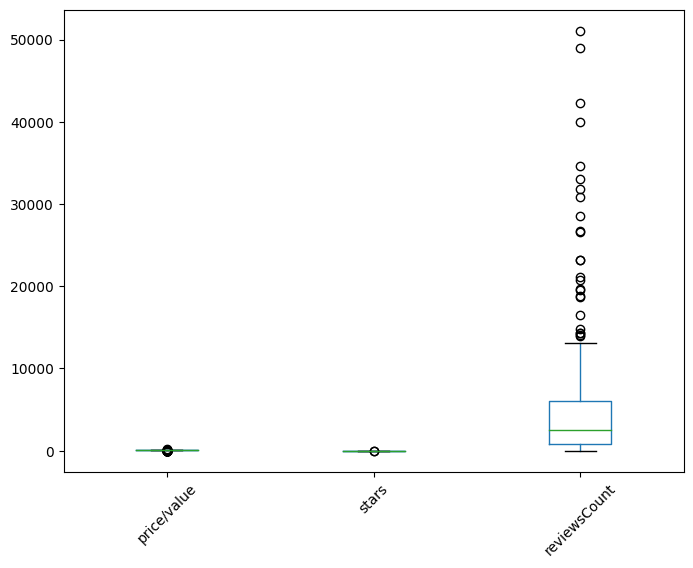

In [25]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Hapus Outliers**

Melakukan penghapusan baris pada kolom "reviewsCount" karena memiliki persentase <= 10% untuk menanganani outliers

In [26]:
Q1 = df['reviewsCount'].quantile(0.25)
Q3 = df['reviewsCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['reviewsCount'] >= lower_bound) & (df['reviewsCount'] <= upper_bound)]

#####**Pengecekkan Ulang**

In [27]:
cols = list(set(cols))

results = []

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)


Kolom,Persentase Outliers
price/value,37.606838
stars,0.854701
reviewsCount,4.273504


##**Construct Data**

### **Melakukan Rekayasa Fitur (Feature Engineering)**

Membuat kolom baru dengan nama "StarsCategory" yabg bertujuan untuk mengkategorikan data pada kolom "stars" ke dalam tiga kategori yang berbeda berdasarkan rentang nilai.

In [28]:
def categorize_stars(stars):
    if 3.8 <= stars < 4.0:
        return 'Sedang'
    elif 4.0 <= stars < 4.4:
        return 'Baik'
    else:
        return 'Tinggi'

df['StarsCategory'] = df['stars'].apply(categorize_stars)


###**Pengecekkan Hasil**

In [29]:
df.head(20)

,title,brand,description,price/currency,price/value,stars,reviewsCount,StarsCategory
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,"Timeless and original, colorful and bold. Disc...",$,20.99726,4.4,8032.0,Tinggi
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,"Timeless and original, colorful and bold. Disc...",$,20.99726,4.5,475.0,Tinggi
3,Locs Gangster Oversized Rectangular Horn Rim S...,Locs,Macho men's authentic OG Locs gangster shades ...,$,7.35000,4.5,3090.0,Tinggi
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,"Timeless and original, colorful and bold. Disc...",$,20.99726,4.4,6299.0,Tinggi
5,SOJOS Classic Square Sunglasses for Women Men ...,SOJOS,"Timeless and original, colorful and bold. Disc...",$,20.99726,4.6,4397.0,Tinggi
6,MERRY'S Rectangular Polarized Sports Sunglasse...,MERRY'S,"Timeless and original, colorful and bold. Disc...",$,13.99000,4.4,6977.0,Tinggi
8,grinderPUNCH XL Men's Big Wide Frame Black Sun...,grinderPUNCH,Dark Black Tint Lens! Perfect for Days Spent o...,$,15.99000,4.2,4207.0,Baik
9,Buyisgle Eye Glasses Holder Strap - Sunglasses...,Buyisgle,"Timeless and original, colorful and bold. Disc...",$,9.96000,4.6,46.0,Tinggi
10,Locs Sunglasses Hardcore Black 0103,Locs,"Timeless and original, colorful and bold. Disc...",$,20.99726,4.5,3158.0,Tinggi
11,LINVO Polarized Sunglasses for Men Driving Sun...,LINVO,"CLASSIC, NEVER OUT OF DATE! WITH LINVO, ENJOY ...",$,20.99726,4.5,4840.0,Tinggi


##**Data Reduction**

### **Mengurangi Fitur yang Kurang Relevan**

Dalam hal ini, kolom "description" dihapus karena tidak relevan dengan analisis yang dilakukan,

In [30]:
df = df.drop(['description'], axis=1)

### **Pengecekkan Hasil**

In [31]:
df.head()

,title,brand,price/currency,price/value,stars,reviewsCount,StarsCategory
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,$,20.99726,4.4,8032.0,Tinggi
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,$,20.99726,4.5,475.0,Tinggi
3,Locs Gangster Oversized Rectangular Horn Rim S...,Locs,$,7.35000,4.5,3090.0,Tinggi
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,$,20.99726,4.4,6299.0,Tinggi
5,SOJOS Classic Square Sunglasses for Women Men ...,SOJOS,$,20.99726,4.6,4397.0,Tinggi


##**Data Transformation**

### **Mapping**

Melakukan mapping untuk mengubah tipe data pada kolom kategorikal agar menjadi numerik untuk memudahkan sistem dalam membaca data. Dalam hal ini, metode mapping digunakan untuk memetakan data pada kolom "StarsCategory" ke dalam bilangan bulat. Sedang akan diganti dengan 0, Baik dengan 1, dan Tinggi dengan 2.

In [32]:
df['StarsCategory'] = df['StarsCategory'].map({'Sedang': 0, 'Baik': 1, 'Tinggi': 2}).astype(int)



### **Pengecekkan Hasil**

In [33]:
df.head(20)

,title,brand,price/currency,price/value,stars,reviewsCount,StarsCategory
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,$,20.99726,4.4,8032.0,2
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,$,20.99726,4.5,475.0,2
3,Locs Gangster Oversized Rectangular Horn Rim S...,Locs,$,7.35000,4.5,3090.0,2
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,$,20.99726,4.4,6299.0,2
5,SOJOS Classic Square Sunglasses for Women Men ...,SOJOS,$,20.99726,4.6,4397.0,2
6,MERRY'S Rectangular Polarized Sports Sunglasse...,MERRY'S,$,13.99000,4.4,6977.0,2
8,grinderPUNCH XL Men's Big Wide Frame Black Sun...,grinderPUNCH,$,15.99000,4.2,4207.0,1
9,Buyisgle Eye Glasses Holder Strap - Sunglasses...,Buyisgle,$,9.96000,4.6,46.0,2
10,Locs Sunglasses Hardcore Black 0103,Locs,$,20.99726,4.5,3158.0,2
11,LINVO Polarized Sunglasses for Men Driving Sun...,LINVO,$,20.99726,4.5,4840.0,2
